# Kenngrößen

Eine Wechselgröße, z.B. eine Wechselspannung, liegt in der allgemein Form als Sinusschwingung vor. Die Form wollen wir im folgenden wiefolgt bescheiben:

$$u(t) = \hat u \cdot \sin(\omega t)$$

In elektronischen Schaltungen hat man dazu eine Stromstärke, der dieser Wechselspannung zugehörig ist, und sich allgemein wiefolgt schreiben lässt:

$$i(t) = \hat i \cdot \sin(\omega t + \phi)$$

Der Stromstärke haben wir die Phase $\phi$ hinzugefügt, da durch besondere Komponenten in der Schaltung, wie z.B. ein Kondensator oder eine Spule, eine Verzögerung zwischen Spannung und Stromstärke auftritt. Im klassischen Stromkreis, mit lediglich einem Widerstand, ist so eine Verzögerung meist vernachlässigbar. 

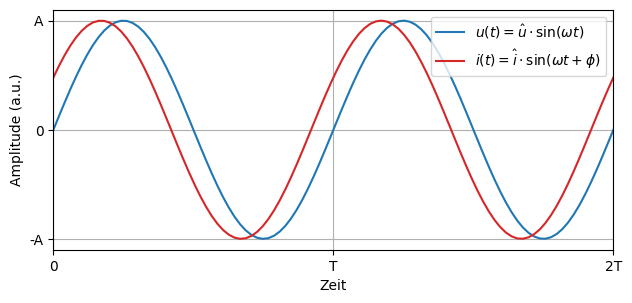

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t,A * np.sin(2*np.pi*f*t + phi), 'tab:blue',label = r'$u(t) = \hat u \cdot \sin(\omega t)$')
ax.plot(t,A * np.sin(2*np.pi*f*t + 0.5), 'tab:red', label = r'$i(t) = \hat i \cdot \sin(\omega t + \phi)$')
ax.set_xlabel('Zeit')
ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlim(0,2*T)
ax.set_xticks([0, T, 2*T])
ax.set_xticklabels(['0','T','2T'])
ax.set_yticks([-A, 0, A])
ax.set_yticklabels(['-A','0','A'])
#ax.set_title(r'u(t) =%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$ + $\phi$)' %(A, 2*np.pi*f))
ax.grid()
ax.legend()
plt.show()

Bei einem Wechselsignal interessiert man sich häufig nicht für den Zeitverlauf, oder den einzelnen Wert zu einem bestimmten Zeitpunkt, den sogenannten Momentanwert. Dieser hat nämlich keine große Aussagekraft, da er sich gemäß der zugrundeliegenden Signalform ständig ändert. Für viele Fragestellungen sind Kenngrößen relevant, die sich aus der Periode des Wechselsignals ermitteln lassen.

## Scheitelfaktor / Amplitude

Mit $\hat U$ bezeichnen wir den **Scheitelfaktor** oder die **Amplitude**. Dies ist der maximale Ausschlag eines Messsignals innerhalb einer Periode (oder Messzeit) $T$.

## Gleichanteil

Der **Gleichanteil** einer Wechselgröße wird über den arithmetischen Mittelwert über eine Perdiode $T$ berechnet. Es ist nur dann aussagekräftig, wenn nicht gerade eine Signal vorliert was keinen Gleichanteil hat. Andernfalls ist der Wert immer 0. 

$$\overline u = \frac{1}{T}\int_{t}^{t+T} u(t)dt$$

## Gleichrichtwert

Wenn wir uns jetzt einen Fön oder eine Lampe, angeschlossen an eine normale Steckdose mit Wechselstrom vorstellen, so ist der Gleichanteil der Wechselspannung 0, aber trotzdem wirkt die Spannung, da Fön bzw. Lampe arbeiten. Das heißt es kommt offensichtlich nicht auf die Polarität der Spannung an, sondern nur darum, dass im Durchschnitt irgendeine Art von beliebig gepolter Spannung anliegt. Mathematisch gesehen entspricht dies einer Betragsbildung und wird durch den Gleichrichtwert definiert.  Das Signal wird mittels analoger Schaltung *gleichgerichtet* (das sehen wir uns später noch mal genauer an), bevor es zur Mittelwertbildung kommt. Daher auch der Name. Der Gleichrichtwert hat auch für Signale ohne Gleichanteil eine Aussagekraft. Der **Gleichrichtwert** einer Wechselgröße ist der Mittelwert des Absolutwertes einer Wechselgröße berechnet sich zu:

$$\overline{|u|} = \frac{1}{T}\int_{t}^{t+T} |u(t)|dt$$


## Effektivwert 

Aus der Physik ist bekannt, dass die Berechnung der elektrischen Leistung *nicht* über den Einbezug von Gleichrichtwerten erfolgt. Vielmehr muss der **Effektivwert** (auch RMS genannt = root mean square) berechnet werden:

$$U = u_\mathrm{eff} = \sqrt{\overline{u^2}} = \sqrt{\frac{1}{T}\int_{t}^{t+T}u(t)^2dt}$$

## Scheitelfaktor und Formfaktor

Mittelwert, Gleichrichtwert und Effektivwert lassen sich für jede beliebige periodische Signalform berechnen und sind *unabhängig* von der Frequenz. Zwischen Ihnen sind Umrechnungsfaktoren definiert, Scheitelfaktoren oder Formfaktoren, welche das Verhältnis zwischen Effektivwert und anderen Kenngrößen angeben. Wir werden später noch sehen, dass die Messung von Effektivwerten sehr aufwendig ist (die mathematischen Operationen im Intergral zeigen dies auch). Es ist einfacher den Scheitel- oder Gleichrichtwert zu messen und mittels dieser Umrechnungs-Faktoren den Effektivwert anschließend zu berechnen. Die Faktoren sind jedoch für jede Signalform anders!

* **Scheitelfaktor (Crest-Faktor)**: 
    
    $$k_S = \frac{\hat u}{u_\mathrm{eff}}$$
    
* **Formfaktor**: 
    
    $$k_F = \frac{u_\mathrm{eff}}{\overline{|u|}}$$
    
Allgemein kann man sagen, dass je größer der Scheitelfaktor, desto mehr übersteigt der Spitzenwert eines Signals den Effektivwert. Für die Praxis bedeutet dies, dass bei der Ermittlung eines Effektivwertes die Messeinrichtung aufgrund sehr hoher Spitzenwerte bereits übersteuert, obwohl der Effektivwert eigentlich noch ausreichend Aussteuerungsreserven aufweist. Besonders kritisch ist dieses Verhalten bei Pulsfolgen mit sehr kleinem Tastverhältnis. Hier kann der Scheitelfaktor unter Umständen Werte von 10 oder mehr annehmen. Messgeräte geben daher häufig Scheitelfaktoren vor, welche nicht überschritten werden sollten. 

## Kenngrößen bei der Digitalisierung 

Bei der digitalen Signalverarbeitung können die oben genannten Kenngrößen ebenfalls mathematisch ermittelt werden, indem die Integrale durch diskrete Summen ausgetauscht werden. Der Effektivwert berechnet sich dann wie folgt:

$$U = u_\mathrm{eff} = \sqrt{\overline{u^2}} = \sqrt{\frac{1}{T}\sum_{k = 1}^{n}T_\mathrm A \cdot  u_k^2}$$

wobei $n$ die Abtastwerte sind, $T_A$ der Abstand zwischen zwei Messungen und $u_k$ der einzelne Messwert zum Zeitpunkt $k\cdot T_A$.


:::{figure-md} abtastung
<img src="draw/abtastung.jpg" alt="abtastung" class="bg-primary mb-1" width="400px" label = abtastung>

Abtastung während der Digitalisierung. Die Abtastung von Messwerten $u_k$ erfolgt in äquidistanten Abständen $T_A$. 
:::


## Beispiele

### Sinussignal mit und ohne Gleichanteil

Beispiel eines Sinussignals mit und ohne Gleichanteil ist im folgenden Plot dargestellt. 

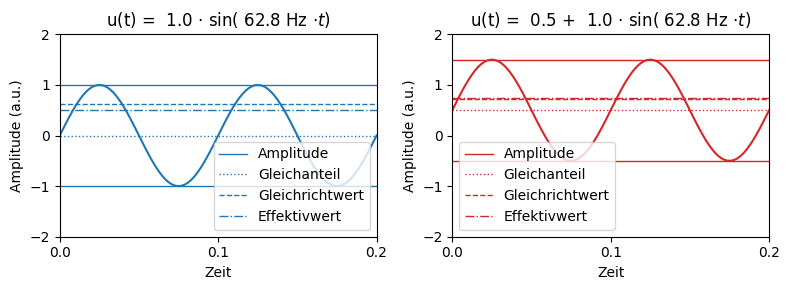

		 ohne Gleichanteil 		 mit Gleichanteil
-------------------------------------------------------------------
Gleichanteil	 -6.286365977370858e-18 	 0.5
Gleichrichtwert	 0.6302006849910228 		 0.7158385086473522
Effektivwert	 0.495 				 0.745
Scheitelfaktor	 2.0202020202020203 		 1.342281879194631
Formfaktor	 0.7854640780135795 		 1.0407375280882154


In [2]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(8,3)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec
A_0 = 0.5

y_ohne = A * np.sin(2*np.pi*f*t + phi)
y_mit = A_0 + A * np.sin(2*np.pi*f*t + phi)

Gleichanteil = [np.mean(y_ohne), np.mean(y_mit)]
Gleichrichtwert = [np.mean(np.abs(y_ohne)), np.mean(np.abs(y_mit))]
Effektivwert = [np.mean(y_ohne**2), np.mean(y_mit**2)]
Scheitelfaktor = [A/Effektivwert[0], A/Effektivwert[1]]
Formfaktor = [Effektivwert[0]/Gleichrichtwert[0], Effektivwert[1]/Gleichrichtwert[1]] 


plt.subplot(1,2,1)
plt.plot(t,y_ohne, 'tab:blue')
plt.axhline(y = A, color='tab:blue', label='Amplitude', lw=1, ls = '-')
plt.axhline(y = -A, color='tab:blue', lw=1, ls = '-')
plt.axhline(y = Gleichanteil[0], color='tab:blue', label='Gleichanteil', lw=1, ls = ':')
plt.axhline(y = Gleichrichtwert[0], color='tab:blue', label='Gleichrichtwert', lw=1, ls = '--')
plt.axhline(y = Effektivwert[0], color='tab:blue', label='Effektivwert', lw=1, ls = '-.')

plt.xlabel('Zeit')
plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,2*T)
plt.xticks([0, T, 2*T])
plt.ylim(-2*A, 2*A)
#plt.set_xticklabels(['0','T','2T'])
plt.yticks([-2*A, -A, 0, A, 2*A])
#plt.yticklabel(['-A','0','A'])
plt.title(r'u(t) =%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$)' %(A, 2*np.pi*f))
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,y_mit, 'tab:red')
plt.axhline(y = A+A_0, color='tab:red', label='Amplitude', lw=1, ls = '-')
plt.axhline(y = -A+A_0, color='tab:red', lw=1, ls = '-')
plt.axhline(y = Gleichanteil[1], color='tab:red', label='Gleichanteil', lw=1, ls = ':')
plt.axhline(y = Gleichrichtwert[1], color='tab:red', label='Gleichrichtwert', lw=1, ls = '--')
plt.axhline(y = Effektivwert[1], color='tab:red', label='Effektivwert', lw=1, ls = '-.')

plt.xlabel('Zeit')
plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,2*T)
plt.ylim(-2*A, 2*A)
plt.xticks([0, T, 2*T])
#plt.set_xticklabels(['0','T','2T'])
plt.yticks([-2*A, -A, 0, A, 2*A])
#plt.yticklabel(['-A','0','A'])
plt.title(r'u(t) =%5.1f +%5.1f $\cdot$ sin(%5.1f Hz $\cdot t$)' %(A_0, A, 2*np.pi*f))
plt.legend()
plt.tight_layout()
plt.show()

print('\t\t ohne Gleichanteil \t\t mit Gleichanteil')
print('-------------------------------------------------------------------')
print('Gleichanteil\t', Gleichanteil[0], '\t', Gleichanteil[1])
print('Gleichrichtwert\t', Gleichrichtwert[0], '\t\t', Gleichrichtwert[1])
print('Effektivwert\t', Effektivwert[0], '\t\t\t\t', Effektivwert[1])
print('Scheitelfaktor\t', Scheitelfaktor[0], '\t\t', Scheitelfaktor[1])
print('Formfaktor\t', Formfaktor[0], '\t\t', Formfaktor[1])

Für beide Fälle kann man die Integrale von oben lösen und erhält vereinfachte Zusammenhänge, die allgemein für **Sinussignale** mit oder ohne Gleichanteil gelten:

**Sinussignal ohne Gleichanteil**: $u(t) = \hat{u}\cdot \sin(\omega t + \phi )$
| Beschreibung | Formel |
|:--------------------|:----------------------------------------|
|Linearer Mittelwert / Gleichanteil | $\overline u = 0$ |
|Gleichrichtwert | $\overline{\lvert u \rvert} = \frac{2}{\pi}\cdot \hat u \approx 0,64 \cdot \hat u$ |
|Effektivwert (RMS | $U = u_\mathrm{eff} = \frac{\hat u}{\sqrt{2}} \approx 0,71 \cdot \hat u$ |
|Scheitelfaktor | $k_S = \frac{\hat u}{u_\mathrm{eff}} = \sqrt{2} \approx 1,41$ |
|Formfaktor | $k_F = \frac{u_\mathrm{eff}}{\overline{\lvert u \rvert}} = \frac{\pi}{2\sqrt{2}} \approx 1,11$ |
    
    
**Sinussignal mit Gleichanteil**: $u(t) = u_0 + \hat{u}\cdot \sin(\omega t + \phi )$
| Beschreibung | Formel |
|:--------------------|:----------------------------------------|
|Linearer Mittelwert / Gleichanteil | $\overline u = u_0$ |
|Gleichrichtwert | $\overline{\lvert u \rvert} = u_0 + \frac{2}{\pi}\cdot \hat u$ |
|Effektivwert (RMS) | $U = u_\mathrm{eff} = \sqrt{u_0^2 + \left(\frac{\hat u}{\sqrt{2}}\right)^2}$ |
    
:::{admonition} Aufgabe
:class: tip
Beweise die eben genannten Formeln für Sinussignale mit und ohne Gleichanteil und vergleiche die Zahlenwerte mit den Simulations-Ergebnissen in Python aus dem oberen Code-Block.
:::

Die Angabe von Scheitel- und Formfaktor haben für Signale mit Gleichanteil keine größere Bedeutung und müssen nicht berechnet werden. Im Vergleich der beiden Beispiele zeigt sich, dass der Effektivwert eines Sinussignals mit Gleichanteil der quadratische Mittelwert der Effektivwerte des Gleichanteils und dem Wert des Gleichanteils $u_0$ entspricht. 

### Pulsweitenmodulation

Ein weiteres Beispiel ist für eine Pulsweitenmodulation berechnet und die Formeln können aus folgendem Bild abgelesen werden. Er handelt sich um ein unsymmetrisches Rechtecksignal. In diesem Fall sprechen wir von einem Pulsweitenmodulierten Signal, da die 'An'-Zeit innerhalb einer bestimmten Anwendung nicht immer gleich groß sein muss. Das Verhältnis 

$$\tau = \frac{\Delta t}{T}$$

wird auch Tastverhältnis genannt. Hierüber kann ein Messwert analog codiert und übertragen werden, während das Signal selber digital ist.

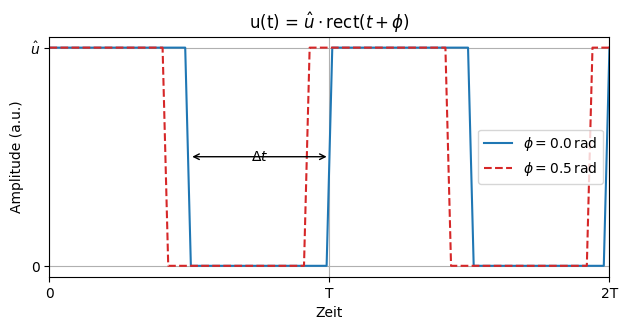

In [3]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

A = 1.0   # Amplitude
f = 10    # Frequenz in Hz
phi = 0.  # Phase in radian
T = 1/f   # Perdiodendauer
t = np.linspace(0,2*T,100) # Zeitwerte der Sinusfunktion in sec

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(t, 0.5*A * signal.square(2 * np.pi * 1/T * t) + 0.5*A, 'tab:blue', label = r'$\phi = 0.0\,\mathrm{rad}$')
ax.plot(t, 0.5*A * signal.square(2 * np.pi * 1/T * t + 0.5) + 0.5*A, 'tab:red', ls = '--',label = r'$\phi = 0.5\,\mathrm{rad}$')
#plt.arrow(0.5*T, 0.5*A, 0.5*T, 0)
plt.annotate(r'', xy=(0.5*T, 0.5*A), xytext=(T, 0.5*A), arrowprops=dict(arrowstyle='<->'))
plt.annotate(r'$\Delta t$', xy=(0.5*T, 0.5*A), xytext=(0.72*T, 0.48*A))
ax.set_xlabel('Zeit')
ax.set_ylabel('Amplitude (a.u.)')
ax.set_xlim(0,2*T)
ax.set_xticks([0, T, 2*T])
ax.set_xticklabels(['0','T','2T'])
ax.set_yticks([0, A])
ax.set_yticklabels(['0',r'$\hat u$'])
ax.set_title(r'u(t) = $\hat u \cdot \mathrm{rect}(t + \phi) $')
ax.grid()
ax.legend()
plt.show()

**Pulssignal**:
| Beschreibung | Formel |
|:--------------------|:----------------------------------------|
|Linearer Mittelwert / Gleichanteil | $\overline u = 0,5 \cdot \hat u $ |
|Gleichrichtwert | $\overline u = \overline{\lvert u \rvert} = \frac{\Delta t}{T}\cdot \hat u$ |
|Effektivwert (RMS) | $U = u_\mathrm{eff} = \sqrt{\overline{u^2}} = \sqrt{\frac{\Delta t}{T}}\cdot \hat u$ |
|Scheitelfaktor | $k_S = \sqrt{ \frac{T}{\Delta t}}$ |
|Formfaktor | $k_F = \sqrt{\frac{T}{\Delta t}}$ |

:::{admonition} Aufgabe
:class: tip
Beweise die eben genannten Formeln für das Pulssignal in der Abbildung.
:::